In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
telco =  pd.read_csv("TelcoCustomerChurn.csv")
telco.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [4]:
telco.shape[0]

7043

In [5]:
# Missing Values
telco.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
# change dtype of Totalcharges to int as TotalCharges is of type object
telco['TotalCharges'] = pd.to_numeric(telco.TotalCharges, errors='coerce')
telco.isnull().sum()*100/telco.shape[0]

customerID          0.000000
gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
tenure              0.000000
PhoneService        0.000000
MultipleLines       0.000000
InternetService     0.000000
OnlineSecurity      0.000000
OnlineBackup        0.000000
DeviceProtection    0.000000
TechSupport         0.000000
StreamingTV         0.000000
StreamingMovies     0.000000
Contract            0.000000
PaperlessBilling    0.000000
PaymentMethod       0.000000
MonthlyCharges      0.000000
TotalCharges        0.156183
Churn               0.000000
dtype: float64

In [7]:
telco["TotalCharges"] = telco["TotalCharges"].fillna(telco["TotalCharges"].mean())


In [8]:
telco.describe(include = 'object')

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,2120-SMPEX,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


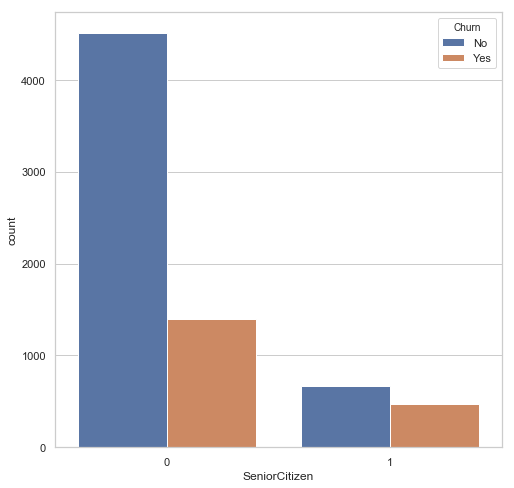

In [9]:
plt.figure(figsize = (8,8))
sns.set(style = 'whitegrid')

sns.countplot(telco.SeniorCitizen, hue = telco.Churn )

In [10]:
pd.crosstab(telco.Churn, telco.SeniorCitizen,
            margins = True)


SeniorCitizen,0,1,All
Churn,,,
No,4508,666,5174
Yes,1393,476,1869
All,5901,1142,7043


In [11]:
print(telco.SeniorCitizen.value_counts(normalize = True))
print("Proportion of senior citizens churning: {} ", 476*100/1142)
print("Proportion of Non - senior citizens churning: {} ", 1393*100/5890)

## More senior citizens are churning 

0    0.837853
1    0.162147
Name: SeniorCitizen, dtype: float64
Proportion of senior citizens churning: {}  41.68126094570928
Proportion of Non - senior citizens churning: {}  23.65025466893039


In [12]:
telco.groupby('SeniorCitizen')['TotalCharges', 'MonthlyCharges'].mean().round()

,TotalCharges,MonthlyCharges
SeniorCitizen,,
0,2181.0,62.0
1,2810.0,80.0


16% of the total customers are senior citizens. They also have high monthly average and also have high churn rate


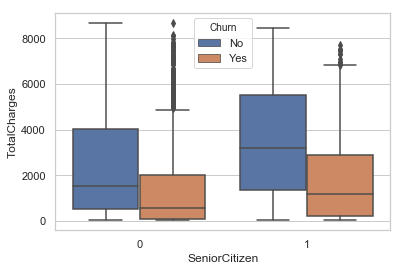

In [13]:
sns.boxplot(x = telco.SeniorCitizen , y = telco.TotalCharges , hue = telco.Churn)

Male and females have same churn rate. gender is not an important variable in predicting Churn

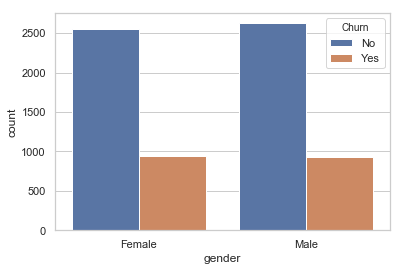

In [14]:
sns.countplot(telco.gender , hue=telco.Churn)

PhoneService,No,Yes,All
Churn,,,
No,512,4662,5174
Yes,170,1699,1869
All,682,6361,7043


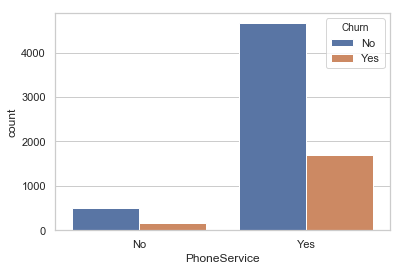

In [15]:
# How does phone service impact churn
sns.countplot(telco.PhoneService , hue = telco.Churn)
pd.crosstab(telco.Churn , telco.PhoneService , margins = True)

Contract  Month-to-month  One year  Two year   All
Churn                                             
No                  2220      1307      1647  5174
Yes                 1655       166        48  1869
All                 3875      1473      1695  7043


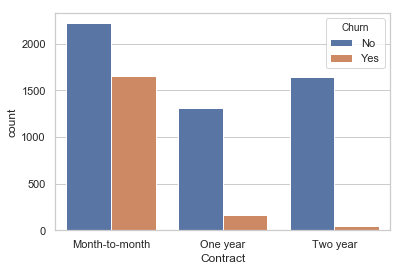

In [16]:
sns.countplot(telco.Contract , hue=telco.Churn)
print(pd.crosstab(telco.Churn , telco.Contract , margins = True))


In [17]:
# Proportion of churn by Contact:
print("Month-to-Month: {}" , 1655*100/3875)
print("one Year: {}" , 166*100/1472)
print("Two years: {}" , 48*100/1685)

## Month to month contract has higher churn rate. 

Month-to-Month: {} 42.70967741935484
one Year: {} 11.277173913043478
Two years: {} 2.8486646884273


In [18]:
telco.groupby(['Contract','SeniorCitizen']).agg({'TotalCharges' :"mean",'MonthlyCharges':'mean' , 'Churn': "count"})

TotalCharges  MonthlyCharges  Churn
Contract       SeniorCitizen                                     
Month-to-month 0               1212.365189       63.115238   3068
               1               1965.706444       78.880545    807
One year       0               2820.256664       62.322798   1283
               1               4478.671053       83.455000    190
Two year       0               3570.198745       58.944548   1550
               1               5326.059655       80.288276    145

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

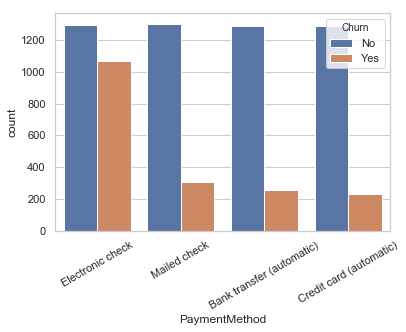

In [19]:
sns.countplot(telco.PaymentMethod , hue = telco.Churn )
plt.xticks(rotation=30)

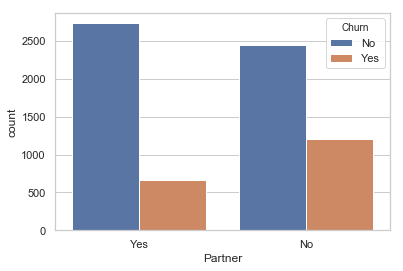

In [20]:
sns.countplot(telco.Partner, hue = telco.Churn)
telco['tenure'] = telco['tenure'].astype('float64')

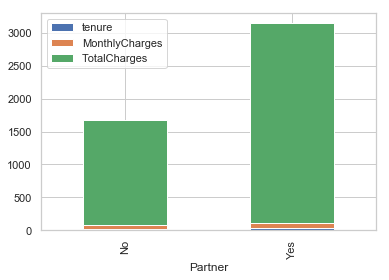

In [21]:
telco.groupby('Partner')['tenure','MonthlyCharges' , 'TotalCharges'].mean().plot(kind = 'bar' , stacked = True )

C:\Users\ganga\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


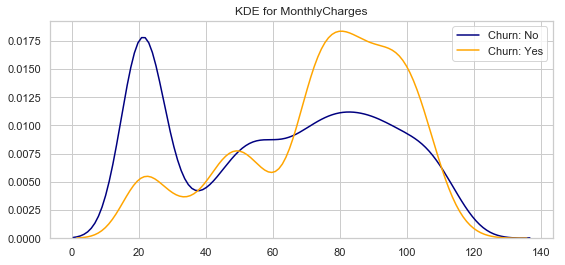

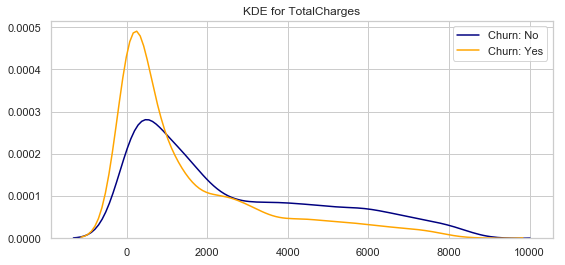

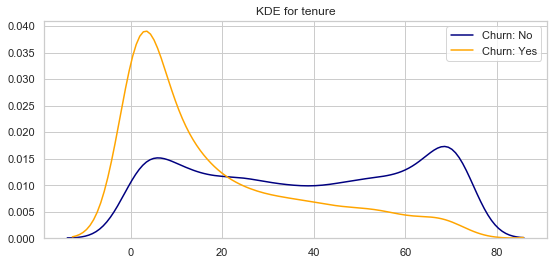

In [22]:
def kdeplot(feature):
    plt.figure(figsize=(9, 4))
    plt.title("KDE for {}".format(feature))
    ax0 = sns.kdeplot(telco[telco['Churn'] == 'No'][feature].dropna(), color= 'navy', label= 'Churn: No')
    ax1 = sns.kdeplot(telco[telco['Churn'] == 'Yes'][feature].dropna(), color= 'orange', label= 'Churn: Yes')

kdeplot('MonthlyCharges')
kdeplot('TotalCharges')
kdeplot('tenure')

#### new customers are more likely to churn.

In [23]:
pd.crosstab(telco.Partner,telco.Dependents)

Dependents,No,Yes
Partner,,
No,3280,361
Yes,1653,1749


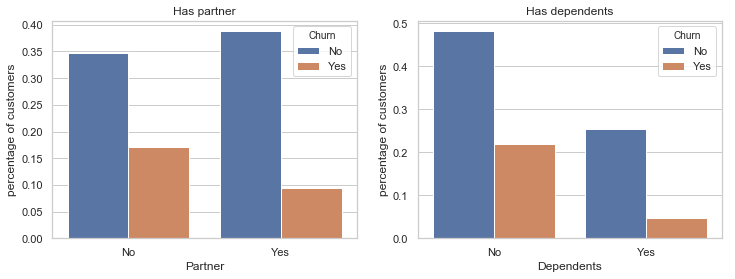

In [24]:
fig, axis = plt.subplots(1, 2, figsize=(12,4))
axis[0].set_title("Has partner")
axis[1].set_title("Has dependents")
axis_y = "percentage of customers"
gp_partner = telco.groupby('Partner')["Churn"].value_counts()/len(telco)
gp_partner = gp_partner.to_frame().rename({"Churn": axis_y}, axis=1).reset_index()
ax = sns.barplot(x='Partner', y= axis_y, hue='Churn', data=gp_partner, ax=axis[0])
# Plot Dependents column
gp_dep = telco.groupby('Dependents')["Churn"].value_counts()/len(telco)
gp_dep = gp_dep.to_frame().rename({"Churn": axis_y}, axis=1).reset_index()
ax = sns.barplot(x='Dependents', y= axis_y, hue='Churn', data=gp_dep, ax=axis[1])

            tenure
Partner           
No       23.357869
Yes      42.017637


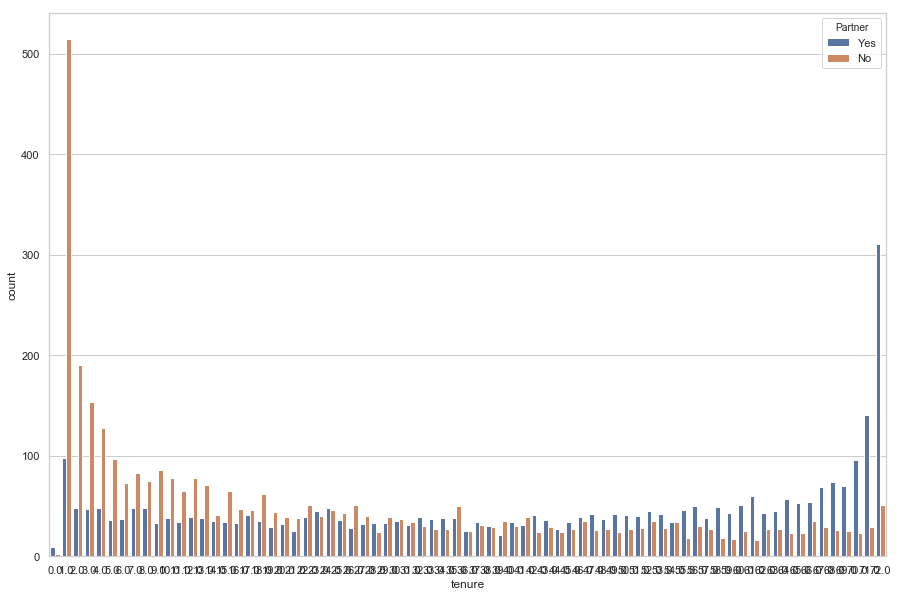

In [25]:
## tenure by partner
plt.figure(figsize = (15,10))
sns.countplot(telco.tenure , hue = telco.Partner)
print(telco.groupby('Partner').agg({'tenure': "mean"}))

Churn,No,Yes,All
MultipleLines,,,
No,2541,849,3390
No phone service,512,170,682
Yes,2121,850,2971
All,5174,1869,7043


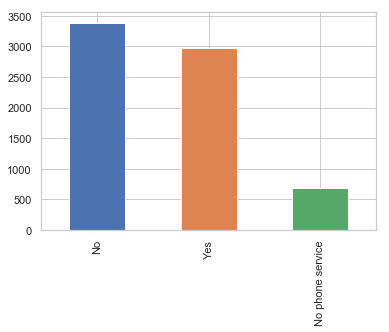

In [26]:
telco['MultipleLines'].value_counts().plot(kind="bar")
pd.crosstab(telco.MultipleLines,telco.Churn , margins = True)

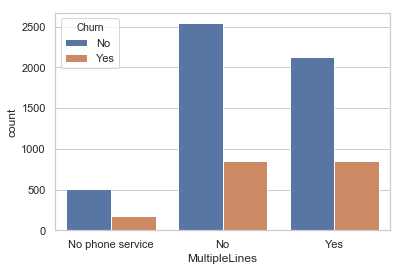

In [27]:
sns.countplot(telco.MultipleLines , hue=telco.Churn)
## people with multiple lines are more likely to churn.


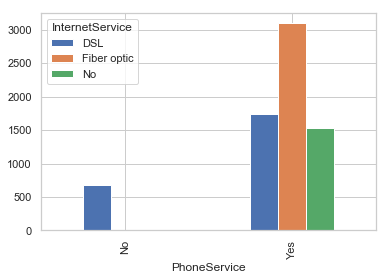

In [28]:
pd.crosstab(telco.PhoneService , telco.InternetService).plot(kind = 'bar')
## implement stratagies to acquire people using phone service but not internet service 


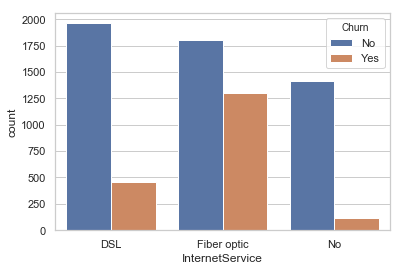

In [29]:
sns.countplot(telco.InternetService , hue = telco.Churn)
## FibreOptics Internet service seems to have high churn rate.

In [30]:
telco.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [31]:
cols_NoInternet = ['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']
for col in cols_NoInternet:
    telco[col].replace(to_replace='No internet service', value = 'No' , inplace =True)
    

In [32]:

le = preprocessing.LabelEncoder()

twoLevel = [ 'Partner','Dependents','PhoneService' ,'OnlineSecurity' , 'OnlineBackup' ,'DeviceProtection','TechSupport', 'StreamingTV' , 
            'StreamingMovies','PaperlessBilling', 'Churn']
for col in twoLevel:
    telco[col].replace(to_replace= ['Yes', 'No'], value= [1,0], inplace = True)

    

In [33]:
telco.head(5)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1.0,0,No phone service,DSL,0,...,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34.0,1,No,DSL,1,...,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,0,0,2.0,1,No,DSL,1,...,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45.0,0,No phone service,DSL,1,...,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2.0,1,No,Fiber optic,0,...,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [34]:
telco.MultipleLines.unique()


array(['No phone service', 'No', 'Yes'], dtype=object)

In [35]:
telco['MultipleLines'] = telco['MultipleLines'].replace(to_replace ='No phone service', value =  'No' )

In [36]:
telco['MultipleLines'] = telco['MultipleLines'].replace(to_replace =['Yes', 'No'], value =  [1,0] )

In [37]:
telco = pd.get_dummies(telco, columns = ['InternetService', 'Contract', 'PaymentMethod'], drop_first = True)


In [38]:

Y = telco['Churn']
X = telco.drop(['customerID' , 'gender' , 'Churn'] , axis = 1)


In [39]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
SeniorCitizen                            7043 non-null int64
Partner                                  7043 non-null int64
Dependents                               7043 non-null int64
tenure                                   7043 non-null float64
PhoneService                             7043 non-null int64
MultipleLines                            7043 non-null int64
OnlineSecurity                           7043 non-null int64
OnlineBackup                             7043 non-null int64
DeviceProtection                         7043 non-null int64
TechSupport                              7043 non-null int64
StreamingTV                              7043 non-null int64
StreamingMovies                          7043 non-null int64
PaperlessBilling                         7043 non-null int64
MonthlyCharges                           7043 non-null float64
TotalCharges                       

In [40]:
from sklearn.model_selection import train_test_split
X_train , X_test,y_train,y_test =  train_test_split(X,Y,test_size=0.25 , random_state = 123)


In [41]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,mean_squared_error


classifiers = [['LogisticRegressionCV: ', LogisticRegression()],
    ["DecisionTreeClassifier: " , DecisionTreeClassifier()],
              ["RandomForestClassifier: ",RandomForestClassifier()],
               ["KNeighborsClassifier: ",KNeighborsClassifier()],
               ["SVC: ",SVC()],
               ["AdaBoostClassifier: ", AdaBoostClassifier()]]

for name,cls in classifiers:
    classifier = cls
    score = classifier.fit(X_train, y_train )
    predictions = classifier.predict(X_test)
    acc_cv = cross_val_score(classifier,X_train, y_train, cv=10,n_jobs =-1)
    RMSE = mean_squared_error(y_train,classifier.predict(X_train))
    print(name, acc_cv.mean(),RMSE)
    
    
    


LogisticRegressionCV:  0.8055690410723491 0.1925407042786823
DecisionTreeClassifier:  0.7307870768173225 0.0026505111700113595
RandomForestClassifier:  0.7822768087300224 0.021204089360090876
KNeighborsClassifier:  0.7713019848771265 0.16603559257856873
SVC:  0.7726202239789196 0.06399091253313138
AdaBoostClassifier:  0.8042364810677665 0.18894358197652406
